# A1

Using a time series model, is there a seasonal trend of when revenue increases and decreases? A decrease in revenue could possibly indicate customer churn and from there analayze if there is a seasonal trend indicating if there is a pattern in customer churning. 

# A2

The goal is to build a time series model where we can predict future revenue predictions, observe seasonality trends and patterns. A decrease in revenue can indicate customer churn.

# B

# Time Series Assumptions
- Data does not contain anomalies
- Model parameters and error term is constant
- Historic timepoints dictate behavior of present timepoints which might not hold in stressed market data conditions 
- Time series is stationary
# Stationarity Assumptions (Datacamp, n.d)
- series have zero trends
- constant in variance
- autocorrelation is constant
# Autocorrelation
- value calculated to show the similarity of a value in the time series to the previous value in the time series (West, 2022).

# C1

In [1]:
# import a couple of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# import data
df = pd.read_csv("teleco_time_series .csv", index_col='Day', parse_dates=False)
# look at the head
df.head(10)

,Revenue
Day,
1,0.000000
2,0.000793
3,0.825542
4,0.320332
5,1.082554
6,0.107654
7,0.493901
8,0.376698
9,0.304075


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  731 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [3]:
df.duplicated()

Day
1      False
2      False
3      False
4      False
5      False
       ...  
727    False
728    False
729    False
730    False
731    False
Length: 731, dtype: bool

In [4]:
df.isnull().any()

Revenue    False
dtype: bool

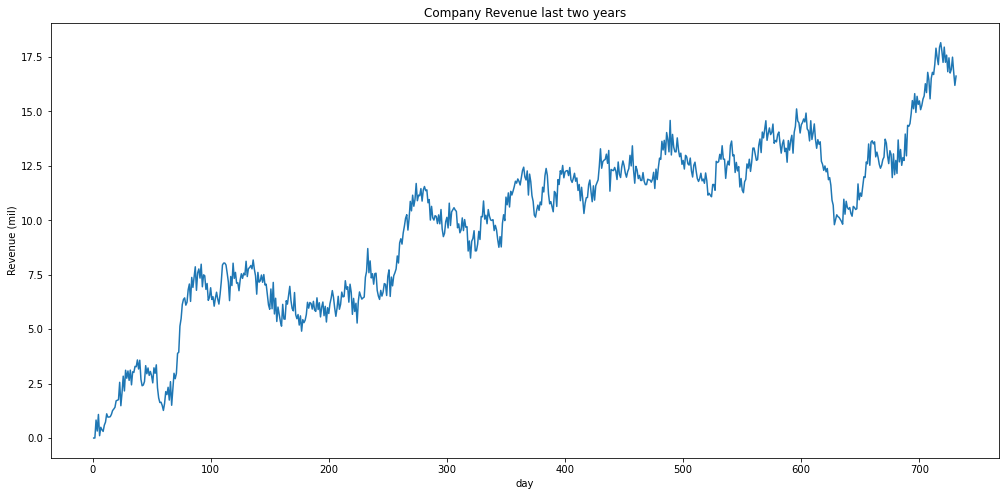

In [5]:
#Visual line graph of the time series

plt.figure(figsize=(17, 8))
plt.plot(df.Revenue)
plt.title('Company Revenue last two years')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

# C2

The time step format of this dataset is measured in days, it can be seen that the data type for day is in integers. It also shows that there are no gaps in the dataset. The length of the sequence is 731 data points. Also the dataset shows that there are no duplicates.

# C3

As seen on the 'Company Revenue last two years' plot, the can be see that it is non-stationary as the plot has an upward trend. In order to make it stationary we will take the difference of the dataset. we can also take the dickey-fuller to test for stationarity.

# C4

- 1) understand the dataframe using the .info() function and clean
- 2) difference the data to make stationary
- 3) split data in train and test 80/20. Set training, early data will be used for training, later data will be used for testing
- 4) Perform spectral density
- 5) Perform ACF and PACF
- 6) decompose dataset
- 7) plot the trend, seasonality, and residual components
- 8) Perform AIC to find the best model order number
- 9) Fit AR and MA model
- 10) Use auto_arima
- 11) Fit ARIMA model 
- 12) Create time series model with the best order number
- 13) Create prediction with test dataset
- 14) Perform forecast with training dataset
- 15) Evaluate model

# C5

In [6]:
import math
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [7]:
df

,Revenue
Day,
1,0.000000
2,0.000793
3,0.825542
4,0.320332
5,1.082554
...,...
727,16.931559
728,17.490666
729,16.803638


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  731 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


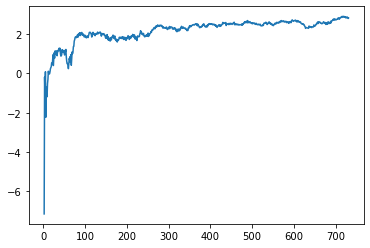

In [9]:
lndf = np.log(df)
lndf
plt.plot(lndf)
plt.show()

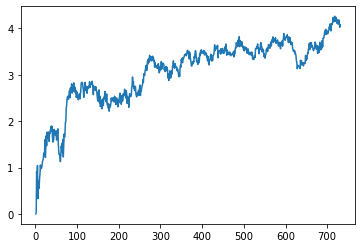

In [10]:
sqrtdf = np.sqrt(df)
plt.plot(sqrtdf)
plt.show()

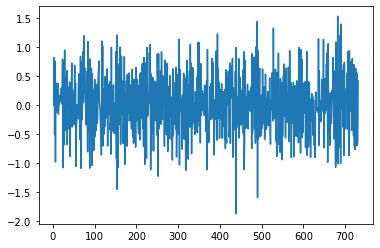

In [11]:
# taking the difference makes the dataset stationary
diffdf = df.diff()
plt.plot(diffdf)
plt.show()

In [12]:
#taking the difference to make it more stationary

df_stationary = df.diff().dropna()
df_stationary

,Revenue
Day,
2,0.000793
3,0.824749
4,-0.505210
5,0.762222
6,-0.974900
...,...
727,0.170280
728,0.559108
729,-0.687028


In [13]:
#copy of cleaned dataset
df_stationary.to_csv('df_prepared_PA1.csv')

In [14]:
# train and split the dataset
df_train = df_stationary.loc[:'548']
df_test = df_stationary.loc['549':]

# D1

In [15]:
from scipy import signal

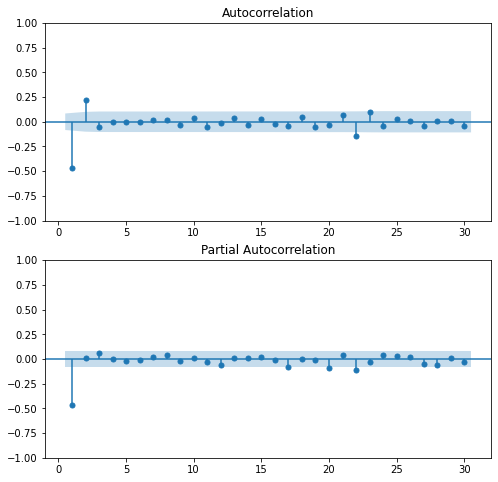

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(df_train, lags=30, zero=False, ax=ax1)
plot_pacf(df_train, lags=30, zero=False, ax=ax2)
plt.show()


From the ACF and PACF possible AR(1), AR(2). The ACF tells the correlations of the current observed data value to the previous data value on the time series. The PACF tells the correlation of two data values to another data value (leonie, 2022).

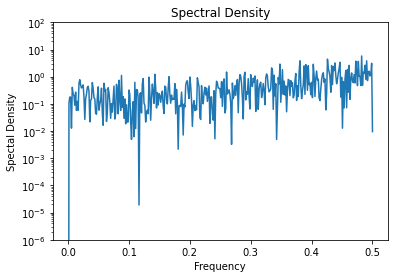

In [17]:
f, Pxx_den = signal.periodogram(df_stationary['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim([1e-6, 1e2])
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectal Density')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

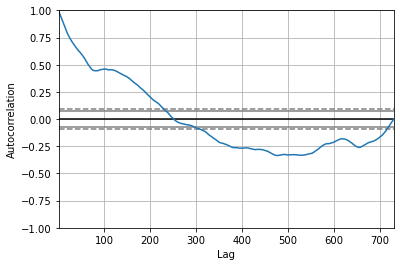

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)

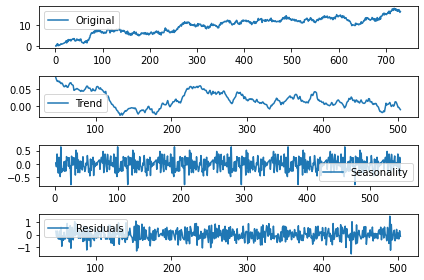

In [19]:
# decomposed the cleaned dataset
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_train, model='additive', period =90)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


- There seems to be a presence of seasonality from the plot
- The residual shows a lack of trend thus is not autocorrelated

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
results = adfuller(df)
print(results)
if results[1]<= 0.05:
    print('reject null hypothesis, time series is stationary')
else:
    print('fail to reject null hypothesis, time series is non-stationary')
# p-value is greater than 0.05 so we accept the null-hypothesis and it is non-stationary

(-1.9246121573101798, 0.32057281507939817, 1, 729, {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}, 965.0609576707513)
fail to reject null hypothesis, time series is non-stationary


In [22]:
results = adfuller(df_stationary)
print(results)
if results[1]<= 0.05:
    print('reject null hypothesis, time series is stationary')
else:
    print('fail to reject null hypothesis, time series is non-stationary')

# test statistic (-44.87) indicates that it is more likely to be stationary being more negative
# p-value (0.0) being smaller than 0.05 indicates to reject the null hypothesis reject non-stationary

(-44.874527193875984, 0.0, 0, 729, {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}, 965.5032159185916)
reject null hypothesis, time series is stationary


In [23]:
model_1 = sm.tsa.arima.ARIMA(df_stationary, order=(1,1,1))
results_2=model_1.fit()
print(results_2.summary())
print(results_2.params)

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  730
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -492.072
Date:                Sun, 26 Jun 2022   AIC                            990.144
Time:                        20:28:49   BIC                           1003.919
Sample:                             0   HQIC                           995.459
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4685      0.033    -14.124      0.000      -0.534      -0.403
ma.L1         -1.0000      0.449     -2.225      0.026      -1.881      -0.119
sigma2         0.2235      0.102      2.199      0.0

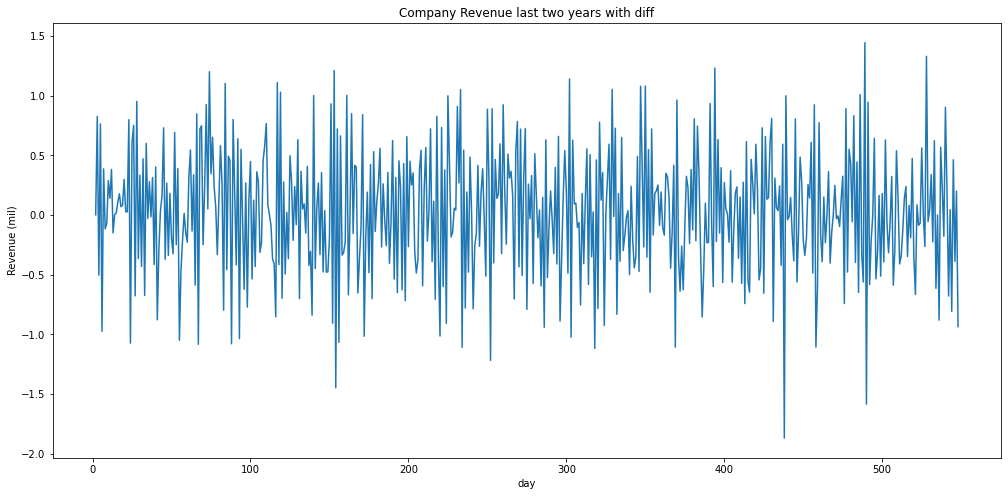

In [24]:
plt.figure(figsize=(17, 8))
plt.plot(df_train)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

<AxesSubplot:title={'center':'seasonality'}, xlabel='Day'>

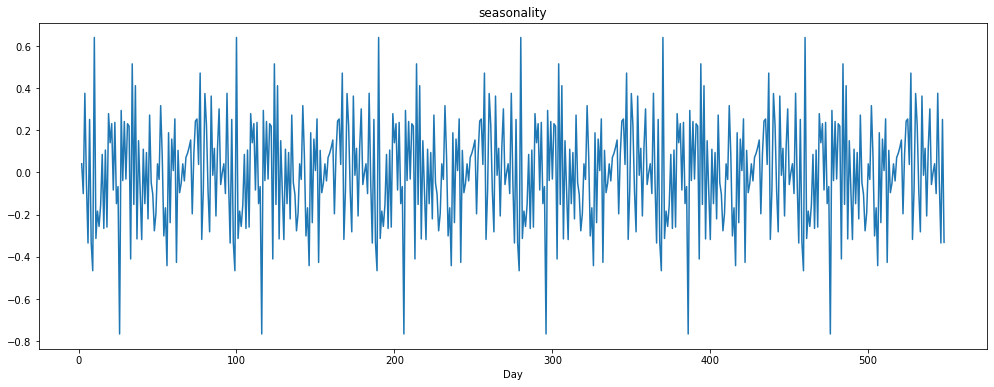

In [25]:
plt.title('seasonality')
decomposition.seasonal.plot(figsize=(17,6))

<AxesSubplot:title={'center':'trend'}, xlabel='Day'>

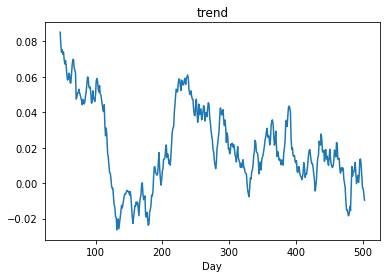

In [26]:
plt.title('trend')
decomposition.trend.plot()

<AxesSubplot:title={'center':'residual'}, xlabel='Day'>

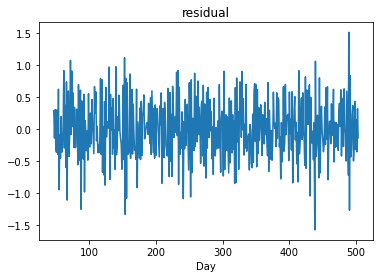

In [27]:
plt.title('residual')
decomposition.resid.plot()

The residual plot shows a lack of trend

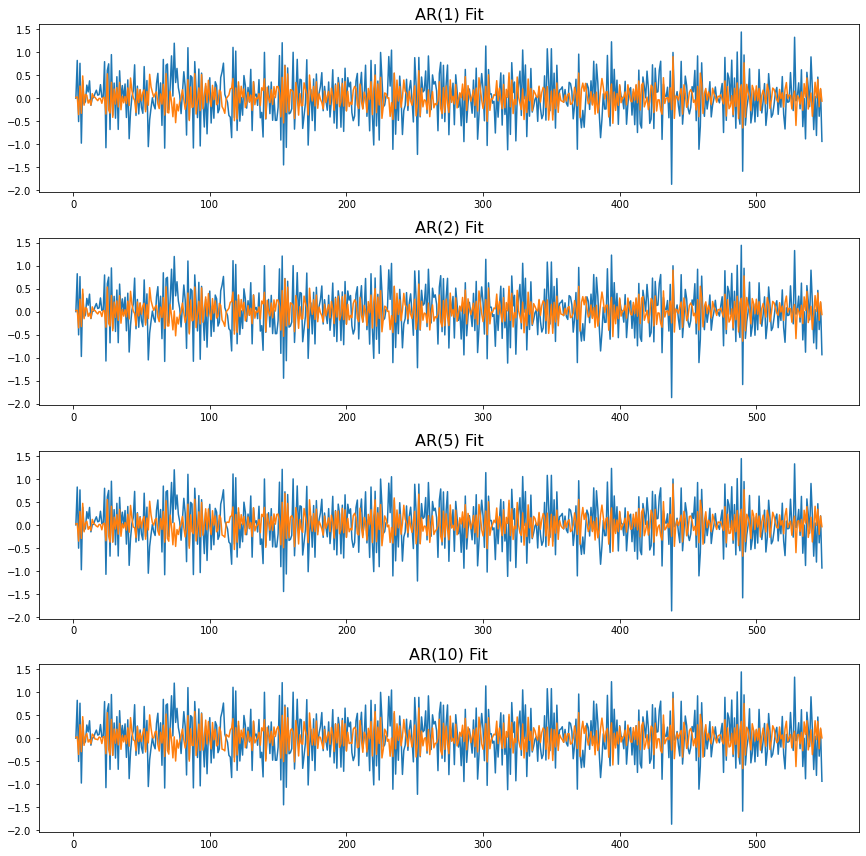

In [28]:
plt.figure(figsize=(12,12))

ar_orders = [1,2,5,10]
fitted_model_dict = {}
for idx, ar_order in enumerate(ar_orders):
    ar_model = sm.tsa.arima.ARIMA(df_train, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(df_train)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)
    
plt.tight_layout()

In [29]:
# AIC comparision
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 731.041126224867
AIC for AR(2): 733.0197432237045
AIC for AR(5): 736.6694244440871
AIC for AR(10): 745.4908786379765


In [30]:
# BIC comparision
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 743.9544726321329
BIC for AR(2): 750.2375384333924
BIC for AR(5): 766.800566061041
BIC for AR(10): 797.1442642670403


In [31]:
#AR model
model_train = sm.tsa.arima.ARIMA(df_train, order=(1,1,0), seasonal_order=(1,1,0,90))
results_train=model_train.fit()

In [32]:
print(results_train.summary())

                                    SARIMAX Results                                     
Dep. Variable:                          Revenue   No. Observations:                  547
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 90)   Log Likelihood                -529.891
Date:                          Sun, 26 Jun 2022   AIC                           1065.782
Time:                                  20:29:00   BIC                           1078.150
Sample:                                       0   HQIC                          1070.654
                                          - 547                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7544      0.030    -24.988      0.000      -0.814      -0.695
ar.S.L90      -0.4758      0.044    -10.843      0.

<AxesSubplot:xlabel='Day'>

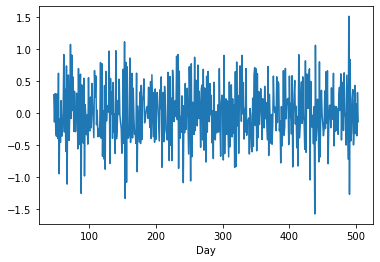

In [33]:
decomposition.resid.plot()

In [34]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pmdarima as pm

In [36]:
pmresultstrain = pm.auto_arima(df_train,seasonal=90,
                           d=1, trace=True,stationary=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(pmresultstrain)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=734.752, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=863.397, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=731.041, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=758.172, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=862.259, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=733.020, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=733.024, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=734.556, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=731.534, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.053 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept


In [37]:
print(pmresultstrain.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  547
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -362.521
Date:                Sun, 26 Jun 2022   AIC                            731.041
Time:                        20:29:04   BIC                            743.954
Sample:                             0   HQIC                           736.089
                                - 547                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0318      0.020      1.572      0.116      -0.008       0.071
ar.L1         -0.4676      0.037    -12.532      0.000      -0.541      -0.394
sigma2         0.2203      0.014     15.655      0.0

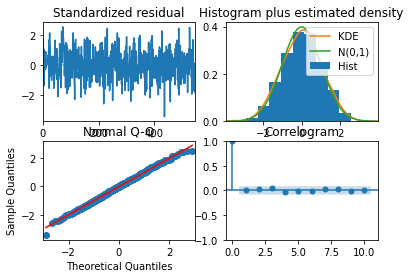

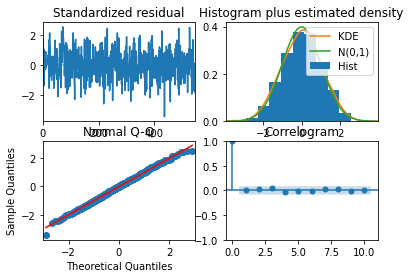

In [38]:
pmresultstrain.plot_diagnostics()

In [39]:
model_train = sm.tsa.arima.ARIMA(df_train, order=(1,1,0))
results_train=model_train.fit()
print(results_train.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  547
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -510.377
Date:                Sun, 26 Jun 2022   AIC                           1024.754
Time:                        20:29:05   BIC                           1033.359
Sample:                             0   HQIC                          1028.118
                                - 547                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7356      0.029    -24.989      0.000      -0.793      -0.678
sigma2         0.3792      0.023     16.434      0.000       0.334       0.424
Ljung-Box (L1) (Q):                  61.51   Jarque-

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
model_train = sm.tsa.arima.ARIMA(df_test, order=(1,1,0))
results_test=model_train.fit()

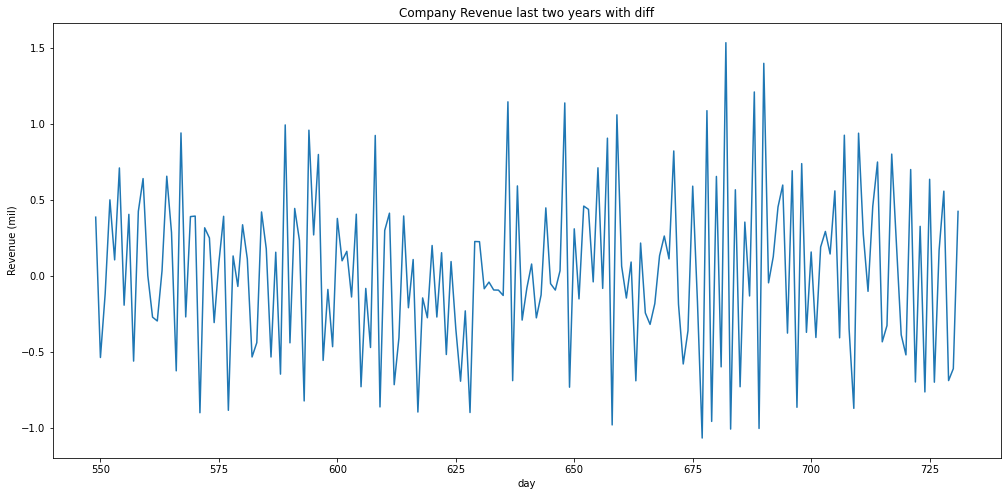

In [42]:
plt.figure(figsize=(17, 8))
plt.plot(df_test)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

In [43]:
print(results_test.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  183
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -177.018
Date:                Sun, 26 Jun 2022   AIC                            358.036
Time:                        20:29:06   BIC                            364.444
Sample:                             0   HQIC                           360.634
                                - 183                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7358      0.054    -13.502      0.000      -0.843      -0.629
sigma2         0.4078      0.049      8.274      0.000       0.311       0.504
Ljung-Box (L1) (Q):                  16.73   Jarque-

In [44]:
model_3 = SARIMAX(df_train['Revenue'], order=(1,1,0))
results_3 = model_3.fit()

In [45]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    rolstd = pd.Series(timeseries).rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

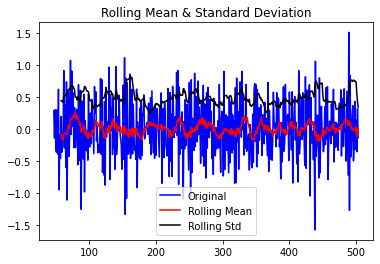

Results of Dickey-Fuller Test:
Test Statistic                -1.270199e+01
p-value                        1.074978e-23
#Lags Used                     2.000000e+00
Number of Observations Used    4.540000e+02
Critical Value (1%)           -3.444836e+00
Critical Value (5%)           -2.867927e+00
Critical Value (10%)          -2.570172e+00
dtype: float64


In [46]:
df_decompose = residual
df_decompose.dropna(inplace=True)
test_stationarity(df_decompose)

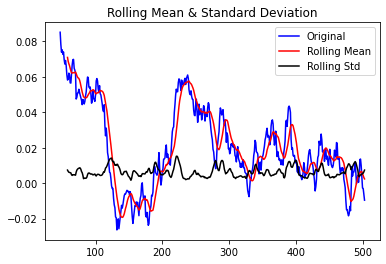

Results of Dickey-Fuller Test:
Test Statistic                  -2.259912
p-value                          0.185223
#Lags Used                      10.000000
Number of Observations Used    446.000000
Critical Value (1%)             -3.445097
Critical Value (5%)             -2.868042
Critical Value (10%)            -2.570233
dtype: float64


In [47]:
df_trend = trend
df_trend.dropna(inplace=True)
test_stationarity(df_trend)

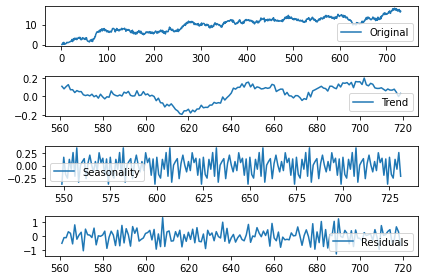

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_test, model='additive', period =25)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(4,1,1)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(4,1,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [49]:
type(decomposition)

statsmodels.tsa.seasonal.DecomposeResult

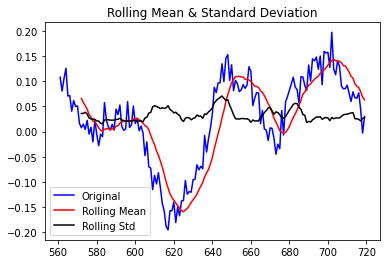

Results of Dickey-Fuller Test:
Test Statistic                  -2.598804
p-value                          0.093245
#Lags Used                      12.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64


In [50]:
df_trend = trend
df_trend.dropna(inplace=True)
test_stationarity(df_trend)

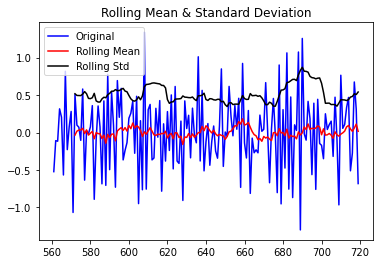

Results of Dickey-Fuller Test:
Test Statistic                 -22.623064
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


In [51]:
df_decompose = residual
df_decompose.dropna(inplace=True)
test_stationarity(df_decompose)

In [52]:
pmresulttest = pm.auto_arima(df_test)
print(pmresulttest)

 ARIMA(1,0,0)(0,0,0)[0]          


In [53]:
print(pmresulttest.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  183
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -126.858
Date:                Sun, 26 Jun 2022   AIC                            257.716
Time:                        20:29:08   BIC                            264.135
Sample:                             0   HQIC                           260.318
                                - 183                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4709      0.070     -6.775      0.000      -0.607      -0.335
sigma2         0.2339      0.027      8.529      0.000       0.180       0.288
Ljung-Box (L1) (Q):                   0.01   Jarque-

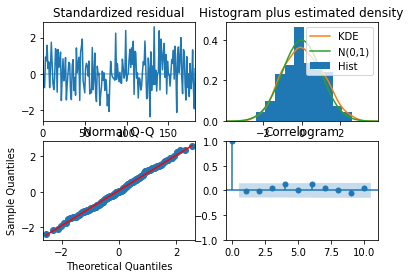

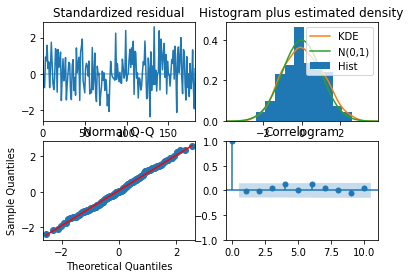

In [54]:
pmresulttest.plot_diagnostics()

- as observed in the decomposition visualizations, a seasonality is observed with the original dataset as well as the stationary dataset.
- with the original dataset there is a positive trend, after differencing to be stationary the dataset loses the trend and is stationary.
- the auto correlation function shows that the data is not correlated, ACF and PACF both tail of indicating an ARMA(p,q) model order 
- 

# D2

From D1 after generating the ACF and PACF, checking the spectral density, and finding the lowest AIC score. It was found the performing the AR(1) model produced the lowest AIC score. The auto_arima function was performed as well which determined that ARIMA model order (1,1,0)(0,0,0)[90] would be the optimal model.

# D3

In [55]:
testtrain = sm.tsa.arima.ARIMA(df_train, order=(1,1,0), seasonal_order=(0,0,0,90))
results_testtrain=testtrain.fit()
print(results_testtrain.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  547
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -510.377
Date:                Sun, 26 Jun 2022   AIC                           1024.754
Time:                        20:29:08   BIC                           1033.359
Sample:                             0   HQIC                          1028.118
                                - 547                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7356      0.029    -24.989      0.000      -0.793      -0.678
sigma2         0.3792      0.023     16.434      0.000       0.334       0.424
Ljung-Box (L1) (Q):                  61.51   Jarque-

In [56]:
model_train = sm.tsa.arima.ARIMA(df_train, order=(1,1,0), seasonal_order=(1,1,0,90))
#model_train = sm.tsa.arima.ARIMA(df_train, order=(5,1,0))
results_train=model_train.fit()


In [57]:
print(results_train.summary())

                                    SARIMAX Results                                     
Dep. Variable:                          Revenue   No. Observations:                  547
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 90)   Log Likelihood                -529.891
Date:                          Sun, 26 Jun 2022   AIC                           1065.782
Time:                                  20:29:17   BIC                           1078.150
Sample:                                       0   HQIC                          1070.654
                                          - 547                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7544      0.030    -24.988      0.000      -0.814      -0.695
ar.S.L90      -0.4758      0.044    -10.843      0.

In [58]:
residuals_train = results_train.resid

In [59]:
mae_train = np.mean(np.abs(residuals_train))
print(mae_train)

0.635131424936231


In [60]:
diff_forecast = results_train.get_forecast(steps=180)
mean_forecast = diff_forecast.predicted_mean
confidence_intervals = diff_forecast.conf_int()
dates = mean_forecast.index
lower_limits = confidence_intervals.loc[:,'lower Revenue']
upper_limits = confidence_intervals.loc[:,'upper Revenue']
#lower_limits = confidence_intervals.loc[:,0]
#upper_limits = confidence_intervals.loc[:,731]

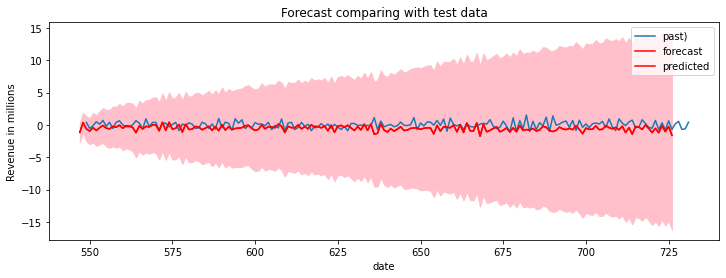

In [61]:
#plot the data
plt.figure(figsize=(12,4))
plt.plot(df_test.index, df_test, label='past)')
#plt mean prediction
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
plt.plot(dates, mean_forecast, color='r', label='predicted')
#sahde the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
#plt.fill_between(dates, lower_limits, upper_limits, color='pink')
# set labels, legends and show plot
plt.title('Forecast comparing with test data')
plt.xlabel('date')
plt.ylabel('Revenue in millions')
plt.legend()
plt.show()

In [62]:
print(mean_forecast.iloc[-1])
print(confidence_intervals.iloc[-1])

-1.6023287062003053
lower Revenue   -16.236265
upper Revenue    13.031608
Name: 726, dtype: float64


In [63]:
model_test = sm.tsa.arima.ARIMA(df_test, order=(1,1,0))
results_test=model_test.fit()
print(results_test.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  183
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -177.018
Date:                Sun, 26 Jun 2022   AIC                            358.036
Time:                        20:29:18   BIC                            364.444
Sample:                             0   HQIC                           360.634
                                - 183                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7358      0.054    -13.502      0.000      -0.843      -0.629
sigma2         0.4078      0.049      8.274      0.000       0.311       0.504
Ljung-Box (L1) (Q):                  16.73   Jarque-

In [64]:
import numpy as np
mae = np.mean(np.abs(results_test.resid))
print('Mean absolute error', mae)

Mean absolute error 0.512571651951137


# D4

Code and calculation above

# D5

code above

# E1

In [65]:
prediction = results_test.get_prediction(start=-35)
mean_prediction = prediction.predicted_mean
confidence_intervals = prediction.conf_int()
lower_limits = confidence_intervals.loc[:,'lower Revenue']
upper_limits = confidence_intervals.loc[:,'upper Revenue']
print(mean_forecast)

547   -1.147016
548    0.371837
549   -0.603614
550   -0.966107
551   -0.420223
         ...   
722   -1.194321
723   -0.125098
724   -1.036998
725   -0.244640
726   -1.602329
Name: predicted_mean, Length: 180, dtype: float64


- The selection process of the ARIMA model was to first generate the ACF and PACF. Then run combinations of AR order numbers to find the lowest AIC score. In this case the AR(1) was the lowest AIC score
- The prediction interval for this forecast was following an interval of days within a two year timeframe
- The dataset used is from revenue generated for the last 2 years. The forecast should only predict up to 1 year of future revenue. Predictions less than 1 year will be more accurate. Predictions larger than 1 year requires more historical data.
- Selecting the best order number by having the best AIC score as well as performing the auto-arima function is a good indicator for the model evaluation. The MAE score for train and test data is not high which is a good indicator.

# E2

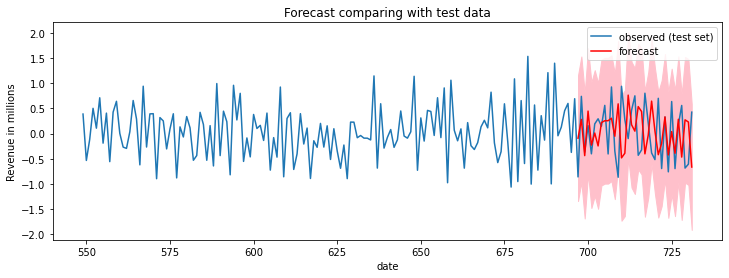

In [66]:
#plot the data
plt.figure(figsize=(12,4))
plt.plot(df_test.index, df_test, label='observed (test set)')
#plt mean prediction
plt.plot(mean_prediction.index, mean_prediction, color='r', label='forecast')
#sahde the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
# set labels, legends and show plot
plt.title('Forecast comparing with test data')
plt.xlabel('date')
plt.ylabel('Revenue in millions')
plt.legend()
plt.show()

forecast seems to match the observed dataset well.

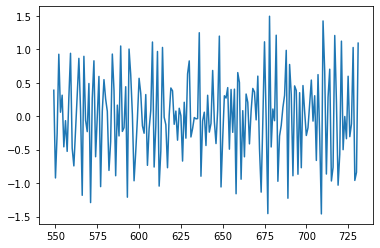

In [67]:
residual_test = results_test.resid
plt.plot(residual_test)

residual plot looks normal

In [68]:
mae = np.mean(np.abs(residual_test))
print(mae)

0.512571651951137


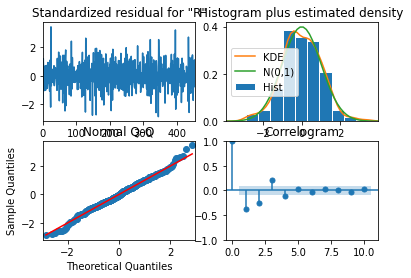

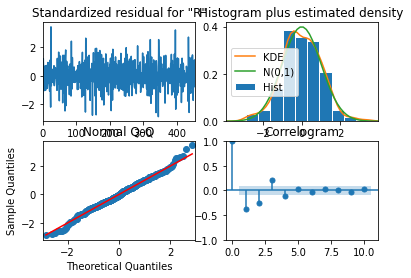

In [69]:
results_train.plot_diagnostics()

In [70]:
print(results_train.summary())

                                    SARIMAX Results                                     
Dep. Variable:                          Revenue   No. Observations:                  547
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 90)   Log Likelihood                -529.891
Date:                          Sun, 26 Jun 2022   AIC                           1065.782
Time:                                  20:29:19   BIC                           1078.150
Sample:                                       0   HQIC                          1070.654
                                          - 547                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7544      0.030    -24.988      0.000      -0.814      -0.695
ar.S.L90      -0.4758      0.044    -10.843      0.

- Prob(Q) = 0.00 is less than 0.05 means the residual is uncorrelated
- Prob(JB) = 0.34 greater than 0.05 means that the residual is not normally distributed

# E3

The diagnostics explains the residual is good enough, the time series model can predict 90 days future revenue. This is useable information for the company to predict future revenue and evaluate the impact of customer churning based on the presence of seasonality.

# F

file:///C:/Users/micha/Downloads/D213Task1.2%20(2).html

# G

- https://campus.datacamp.com/courses/arima-models-in-python/chapter-1-arma-models?ex=1 (Datacamp, n.d)
- Peixeiro, M. (2019, August 7). The Complete Guide to Time Series Analysis and forecasting. Medium. Retrieved June 22, 2022, from https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775 
- ARIMA and Python: Stock Price Forecasting using statsmodels,
https://www.youtube.com/watch?v=o7Ux5jKEbcw

# H

- ARIMA Models in Python. Retried on June 21, 2022, from https://campus.datacamp.com/courses/arima-models-in-python/chapter-1-arma-models?ex=1
- leonie, I. (2022, March 15). Time Series: Interpreting ACF and PACF. Kaggle. Retrieved June 21, 2022, from https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook 
- West, Z. (2022, June 16). Autocorrelation of time series data in Python. αlphαrithms. Retrieved June 21, 2022, from https://www.alpharithms.com/autocorrelation-time-series-python-432909/#:~:text=Autocorrelation%20(ACF)%20is%20a%20calculated,values%20in%20time%20series%20data. 


# I